In [35]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from matplotlib import colormaps


from keras.preprocessing.image import array_to_img, load_img



In [2]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
Labels = ['Plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',' ship', 'truck']

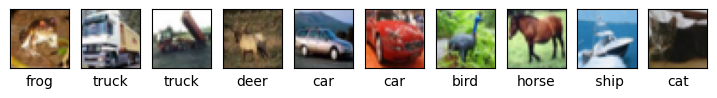

In [4]:
plt.figure(figsize=(9, 16))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_all[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Labels[y_train_all[i][0]])

plt.show()

In [5]:
x_train_all, x_test = x_train_all/255.0, x_test/255.0

In [6]:
x_train_all = x_train_all.reshape(len(x_train_all), -1)
x_test = x_test.reshape(len(x_test), -1)

In [7]:
x_test.shape

(10000, 3072)

In [8]:
x_val = x_train_all[:10000]
y_val = y_train_all[:10000]

x_train = x_train_all[10000:]
y_train = y_train_all[10000:]

In [9]:
x_train_xs = x_train[:1000]
y_train_xs = y_train[:1000]

In [10]:
model_1 = Sequential([
    Dense(units=128, input_dim=32*32*3, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=10, activation='softmax')

])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
model_1_fit = model_1.fit(x=x_train, y=y_train, batch_size=1000, epochs=60, verbose=0, validation_data=(x_val, y_val))

In [12]:
model_2 = Sequential()
model_2.add(Dropout(rate=0.2, input_shape=(32*32*3,)))
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_2_fit = model_2.fit(x=x_train, y=y_train, batch_size=1000, epochs=60, validation_data=(x_val, y_val), verbose=0)

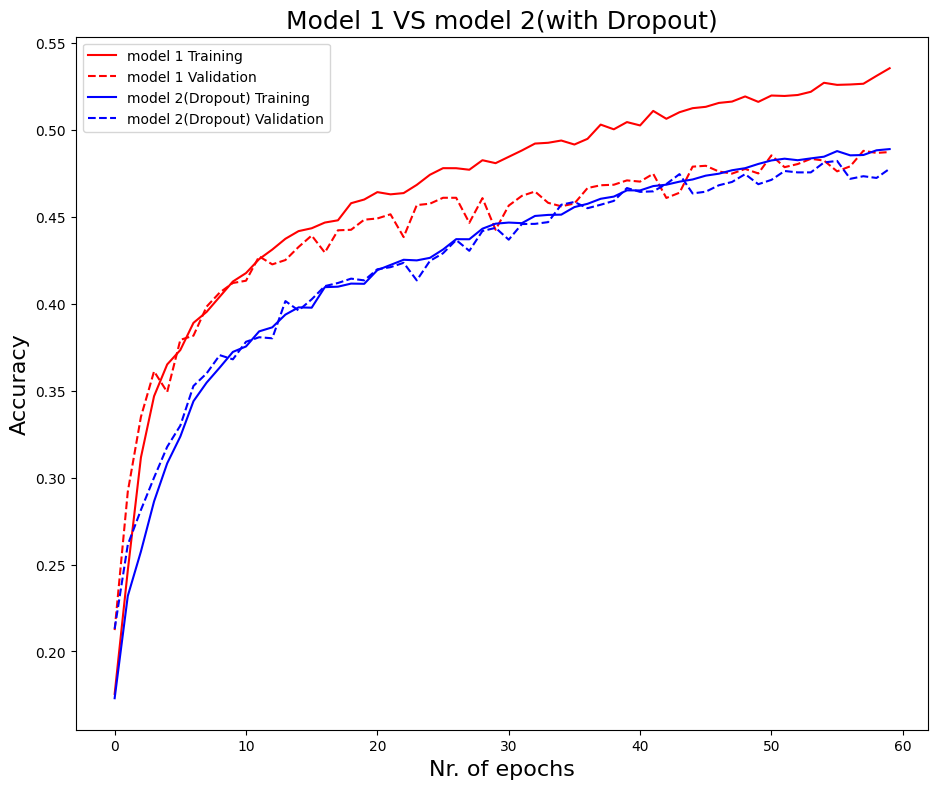

In [14]:
fig, ax = plt.subplots(figsize=(11, 9),
                       ncols=1,
                       nrows=1)
ax.plot(range(len(model_1_fit.history['accuracy'])), model_1_fit.history['accuracy'], color='red', label='model 1 Training')
ax.plot(range(len(model_1_fit.history['accuracy'])), model_1_fit.history['val_accuracy'], color='red', ls='--', label='model 1 Validation')

ax.plot(range(len(model_2_fit.history['accuracy'])), model_2_fit.history['accuracy'], color='blue', label='model 2(Dropout) Training')
ax.plot(range(len(model_2_fit.history['val_accuracy'])), model_2_fit.history['val_accuracy'], color='blue', ls='--',label='model 2(Dropout) Validation')

ax.set_title('Model 1 VS model 2(with Dropout)', fontsize=18 )
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Nr. of epochs', fontsize=16)
plt.legend(['model 1 Training', 'model 1 Validation', 'model 2(Dropout) Training', 'model 2(Dropout) Validation' ])
plt.show()

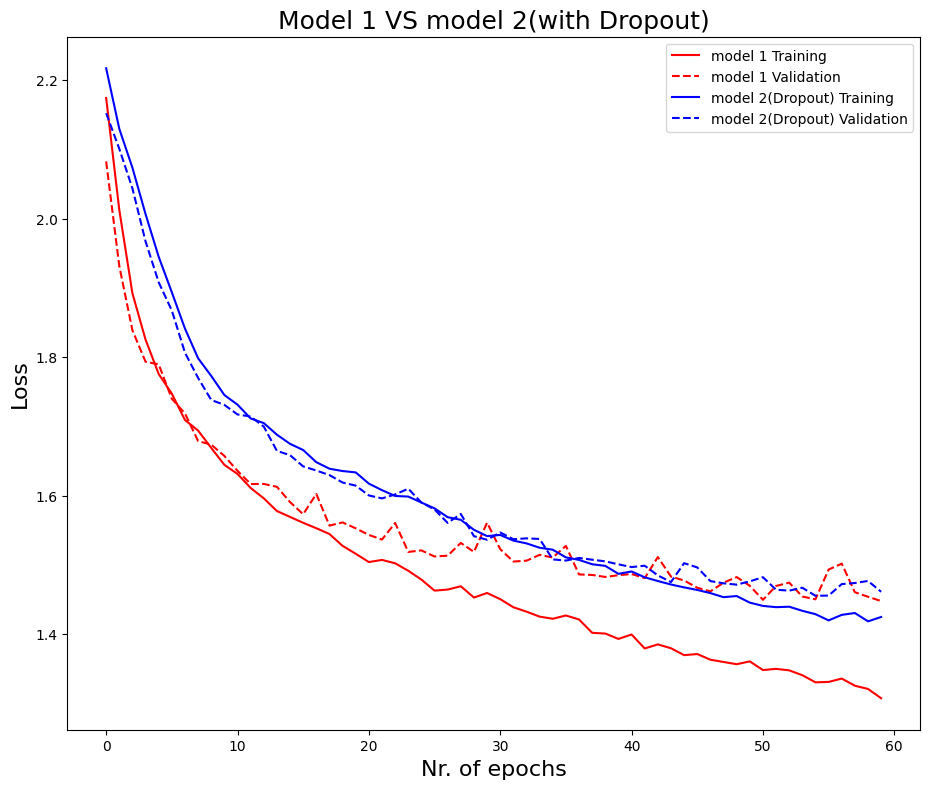

In [15]:
fig, ax = plt.subplots(figsize=(11, 9),
                       ncols=1,
                       nrows=1)
ax.plot(range(len(model_1_fit.history['loss'])), model_1_fit.history['loss'], color='red', label='model 1 Training')
ax.plot(range(len(model_1_fit.history['loss'])), model_1_fit.history['val_loss'], color='red', ls='--', label='model 1 Validation')

ax.plot(range(len(model_2_fit.history['loss'])), model_2_fit.history['loss'], color='blue', label='model 2(Dropout) Training')
ax.plot(range(len(model_2_fit.history['val_loss'])), model_2_fit.history['val_loss'], color='blue', ls='--',label='model 2(Dropout) Validation')

ax.set_title('Model 1 VS model 2(with Dropout)', fontsize=18 )
ax.set_ylabel('Loss', fontsize=16)
ax.set_xlabel('Nr. of epochs', fontsize=16)
plt.legend(['model 1 Training', 'model 1 Validation', 'model 2(Dropout) Training', 'model 2(Dropout) Validation' ])
plt.show()

In [16]:
prediction = model_2.predict(x=x_test[0].reshape(1, 3072))

1/1 [==============================] - 0s 142ms/step


In [17]:
prediction

array([[0.0340092 , 0.01112467, 0.09145594, 0.28861344, 0.09245209,
        0.30259204, 0.10530684, 0.0179483 , 0.04772179, 0.00877572]],
      dtype=float32)

In [18]:
model_2.metrics_names

['loss', 'accuracy']

In [19]:
test_loss, test_accuracy = model_2.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4711 - accuracy: 0.4774


In [21]:
predicted_probs = model_2.predict(x=x_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
predicted_probs[4].argmax()

4

In [23]:
def predicted_classes(predicted_probs):
    y_preds = []
    nr_data = predicted_probs.shape[0]
    for i in range(nr_data):
        y_preds.append(predicted_probs[i].argmax())

    return np.array(y_preds).reshape(nr_data, 1)

In [24]:
predicted_classes(predicted_probs)

array([[5],
       [9],
       [8],
       ...,
       [5],
       [5],
       [7]])

In [49]:
C_M = confusion_matrix(y_true=y_test, y_pred=predicted_classes(predicted_probs))

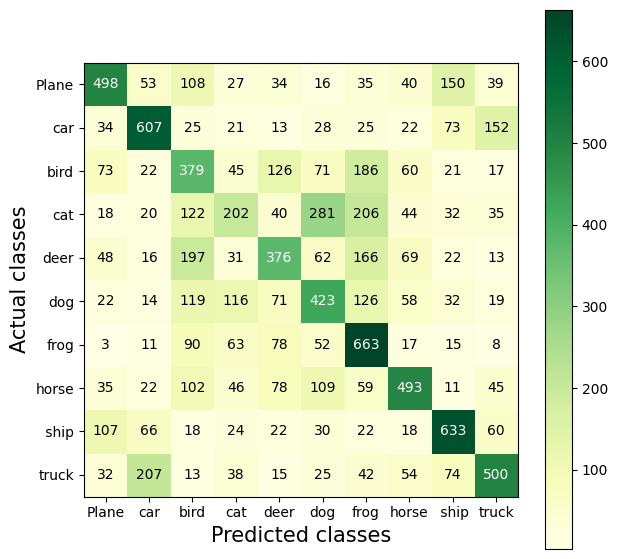

In [69]:
plt.figure(figsize=(7, 7))
plt.imshow(C_M, cmap='YlGn')
plt.xticks(range(10), labels=Labels)
plt.yticks(range(10), labels=Labels)
plt.xlabel('Predicted classes', fontsize=15)
plt.ylabel('Actual classes', fontsize=15)
for i in range(C_M.shape[0]):
    for j in range(C_M.shape[1]):
        plt.text(x=j, y=i, s=C_M[i][j], horizontalalignment='center', verticalalignment='center', color='black' if C_M[i][j] <= C_M.max()/2 else 'white')
plt.colorbar()

In [81]:
true_pos = np.diag(C_M)

Percision_score = true_pos/C_M.sum(axis=0)
recall_score = true_pos/C_M.sum(axis=1)

In [87]:
Percision_score.mean()

0.47915259993219655

In [84]:
f1_score = 2* Percision_score* recall_score/(Percision_score + recall_score)

In [86]:
f1_score.mean()

0.4730163473130545